In [ ]:
#imports
import pandas as pd
import numpy as np
import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras.models import  load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import h5py
import os
import PIL

In [ ]:
#clear session 
K.clear_session()

In [ ]:
#load model
#change according to what the name of the file is for your directory and path
model_file='/12hours_model.hdf5'
model_best=load_model(model_file,compile=False)

In [ ]:
#set params
food_list=['apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio', 'beef_tartare', 'beet_salad', 'beignets', 'bibimbap', 'bread_pudding', 'breakfast_burrito', 'bruschetta', 'caesar_salad', 'cannoli', 'caprese_salad', 'carrot_cake', 'ceviche', 'cheese_plate', 'cheesecake', 'chicken_curry', 'chicken_quesadilla', 'chicken_wings', 'chocolate_cake', 'chocolate_mousse', 'churros', 'clam_chowder', 'club_sandwich', 'crab_cakes', 'creme_brulee', 'croque_madame', 'cup_cakes', 'deviled_eggs', 'donuts', 'dumplings', 'edamame', 'eggs_benedict', 'escargots', 'falafel', 'filet_mignon', 'fish_and_chips', 'foie_gras', 'french_fries', 'french_onion_soup', 'french_toast', 'fried_calamari', 'fried_rice', 'frozen_yogurt', 'garlic_bread', 'gnocchi', 'greek_salad', 'grilled_cheese_sandwich', 'grilled_salmon', 'guacamole', 'gyoza', 'hamburger', 'hot_and_sour_soup', 'hot_dog', 'huevos_rancheros', 'hummus', 'ice_cream', 'lasagna', 'lobster_bisque', 'lobster_roll_sandwich', 'macaroni_and_cheese', 'macarons', 'miso_soup', 'mussels', 'nachos', 'omelette', 'onion_rings', 'oysters', 'pad_thai', 'paella', 'pancakes', 'panna_cotta', 'peking_duck', 'pho', 'pizza', 'pork_chop', 'poutine', 'prime_rib', 'pulled_pork_sandwich', 'ramen', 'ravioli', 'red_velvet_cake', 'risotto', 'samosa', 'sashimi', 'scallops', 'seaweed_salad', 'shrimp_and_grits', 'spaghetti_bolognese', 'spaghetti_carbonara', 'spring_rolls', 'steak', 'strawberry_shortcake', 'sushi', 'tacos', 'takoyaki', 'tiramisu', 'tuna_tartare', 'waffles']

In [ ]:
#import recipes
recipes=pd.read_excel('/Food_rep_man (1).xlsx')

In [ ]:
#for prediction use
def predict_class(model, images, show = True):
  for img in images:
    img = image.load_img(img, target_size=(299, 299))
    img = image.img_to_array(img)                    
    img = np.expand_dims(img, axis=0)         
    img /= 255.                                      

    pred = model.predict(img)
    index = np.argmax(pred)
    food_list.sort()
    pred_value = food_list[index]
    ings=recipe(pred_value)
    print(ings)
    if show:
        plt.imshow(img[0])                           
        plt.axis('off')
        plt.title(pred_value)
        plt.show()

In [ ]:
#helper method to obtain recipe
def recipe(pred):
    index= food_list.index(pred)
    ings =recipes.iloc[index]['Ingredients'].replace('\n','').replace('"','').split(',')
    for i in range(0,len(ings)):
      ings[i]=ings[i].strip()
    return ings


['1 cup cubed homemade-style white or Italian bread (1/2-inch croutons)', '1 garlic clove', 'Salt and pepper', '3 tablespoons olive oil', '1 medium head romaine lettuce', 'leaves separated', 'washed', 'dried and chilled', 'Juice of 1/2 lemon', '3 drops Worcestershire sauce', '1 egg', 'boiled for 1 minute', '2 tablespoons freshly-grated Parmesan cheese']


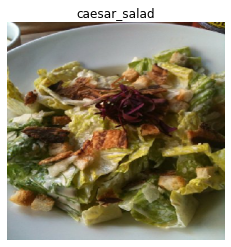

['1 teaspoon ground cinnamon', '1/4 teaspoon ground nutmeg', '2 tablespoons sugar', '4 tablespoons butter', '4 eggs', '1/4 cup milk', '1/2 teaspoon vanilla extract', '8 slices challah', 'brioche', 'or white bread', '1/2 cup maple syrup', 'warmed']


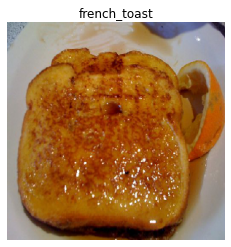

['6 to 8 Granny Smith apples', 'peeled', 'cored', 'and thinly sliced', '1/4 lemon', 'juiced', '1/3 cup sugar', '2 tablespoons butter', '1 recipe pie pastry', 'recipe follows', '2 sticks unsalted butter', 'cold', '2 1/4 cups pastry flour', '1/3 cup sugar', '1/4 teaspoon salt', '1/4 teaspoon baking powder', '5 to 6 tablespoons ice water', '1 teaspoon cider vinegar']


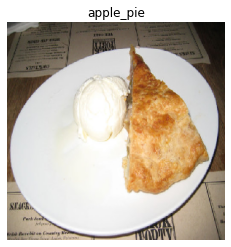

['5 sheets nori', '2 cups sushi rice', 'recipe follows', '2 ounces sushi-grade tuna', 'cut into1/4 by 1/2 by 3-inch strips', '2 ounces sushi-grade salmon', 'cut into1/4 by 1/2 by 3-inch strips', '1 hot house cucumber', 'julienne', '1 carrot', 'peeled and julienne', '1/2 avocado', 'thinly sliced', '5 cups short-grain sushi rice', '6 cups water', '1/2 cup rice vinegar', '2 tablespoons sugar', '1 teaspoon salt']


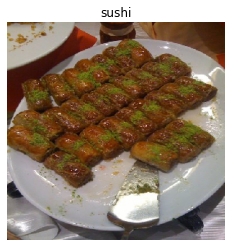

['1 teaspoon ground cinnamon', '1/4 teaspoon ground nutmeg', '2 tablespoons sugar', '4 tablespoons butter', '4 eggs', '1/4 cup milk', '1/2 teaspoon vanilla extract', '8 slices challah', 'brioche', 'or white bread', '1/2 cup maple syrup', 'warmed']


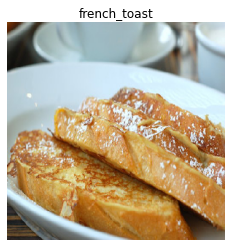

['6 to 8 Granny Smith apples', 'peeled', 'cored', 'and thinly sliced', '1/4 lemon', 'juiced', '1/3 cup sugar', '2 tablespoons butter', '1 recipe pie pastry', 'recipe follows', '2 sticks unsalted butter', 'cold', '2 1/4 cups pastry flour', '1/3 cup sugar', '1/4 teaspoon salt', '1/4 teaspoon baking powder', '5 to 6 tablespoons ice water', '1 teaspoon cider vinegar']


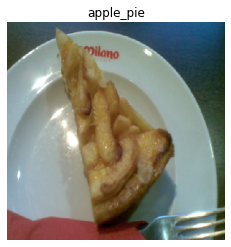

['Nonstick cooking spray', '1 egg', 'lightly beaten', '2 teaspoons Dijon mustard', '1 teaspoon Worcestershire sauce', '1 tablespoon fresh lemon juice', 'Dash hot sauce', '1/2 teaspoon crab boil seasoning (recommended: Old Bay)', '1/2 cup finely chopped red bell pepper', '1 scallion', 'including green top', 'finely chopped', '1 pound lump crab', 'picked over for cartilage', '3/4 cup dry bread crumbs', '1/4 teaspoon salt', 'Freshly ground black pepper', 'Smarter Tartar Sauce', 'recipe follows', '6 tablespoons nonfat plain yogurt', '2 tablespoons mayonnaise', '1 scallion', 'finely chopped', '1/4 cup finely chopped sour pickles', '1 tablespoon chopped capers']


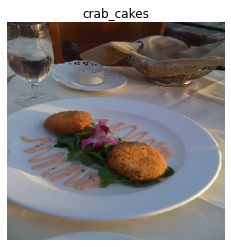

['1 cup cubed homemade-style white or Italian bread (1/2-inch croutons)', '1 garlic clove', 'Salt and pepper', '3 tablespoons olive oil', '1 medium head romaine lettuce', 'leaves separated', 'washed', 'dried and chilled', 'Juice of 1/2 lemon', '3 drops Worcestershire sauce', '1 egg', 'boiled for 1 minute', '2 tablespoons freshly-grated Parmesan cheese']


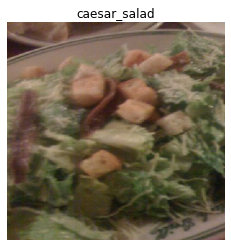

['3 1/2 cups sugar', '2 1/2 cups water', '2 tablespoons honey', '2 teaspoons fresh lemon juice', '1 stick cinnamon', '3 whole cloves', '1/2 pound walnuts', 'finely chopped', '1/2 pound blanched almonds', 'finely chopped', '2 teaspoons ground cinnamon', '1/2 teaspoon ground cloves', '1 1/2 pounds filo pastry', '1 pound (4 sticks) unsalted butter', 'melted']


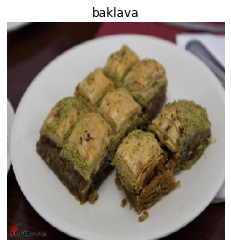

['Nonstick cooking spray', '1 egg', 'lightly beaten', '2 teaspoons Dijon mustard', '1 teaspoon Worcestershire sauce', '1 tablespoon fresh lemon juice', 'Dash hot sauce', '1/2 teaspoon crab boil seasoning (recommended: Old Bay)', '1/2 cup finely chopped red bell pepper', '1 scallion', 'including green top', 'finely chopped', '1 pound lump crab', 'picked over for cartilage', '3/4 cup dry bread crumbs', '1/4 teaspoon salt', 'Freshly ground black pepper', 'Smarter Tartar Sauce', 'recipe follows', '6 tablespoons nonfat plain yogurt', '2 tablespoons mayonnaise', '1 scallion', 'finely chopped', '1/4 cup finely chopped sour pickles', '1 tablespoon chopped capers']


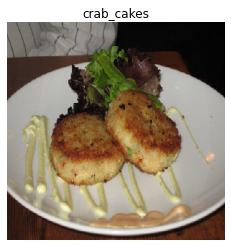

In [ ]:
#run through directory to use model to predict photo.
images=[]
directory='/Demo'
for file in os.listdir(directory):
  if file.endswith(".jpg") or file.endswith('.png'):
    images.append(os.path.join(directory,file))
predict_class(model_best, images, True)